# Problem Statement:
Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all
irrespective of any status. You are required to analyze this health and medical data for better
future preparation.
Do ETL: Extract- Transform and Load data from the heart disease diagnostic database
You can perform EDA through python. The database extracts various information such as
Heart disease rates, Heart disease by gender, by age.
You can even compare attributes of the data set to extract necessary information. Make the
necessary dashboard with the best you can extract from the data. Use various visualization
and features and make the best dashboard
Find key metrics and factors and show the meaningful relationships between attributes.
Do your own research and come up with your findings

In [47]:
# Import all tools

# Regualr data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#We want plots appear inside the notebook
%matplotlib inline

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [48]:
import os
os.chdir('D:/')
data=pd.read_csv("Heart disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [49]:
data.shape

(1025, 14)

In [50]:
# data exploration
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [51]:
# how many of each class
data["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

<Axes: >

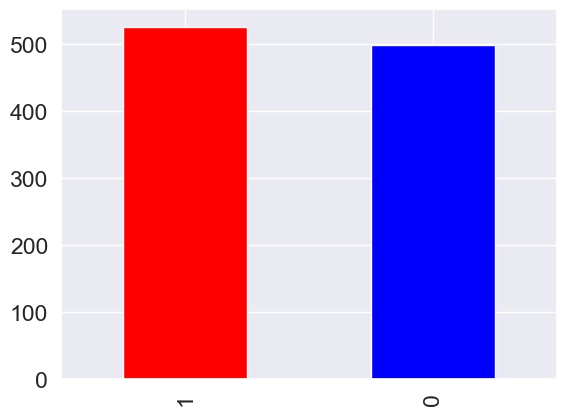

In [52]:
data["target"].value_counts().plot(kind="bar",color=["red","blue"])

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [54]:
# are there any missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Heart Disease Fequency according to sex

In [55]:
data.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [56]:
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,86,413
1,226,300


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

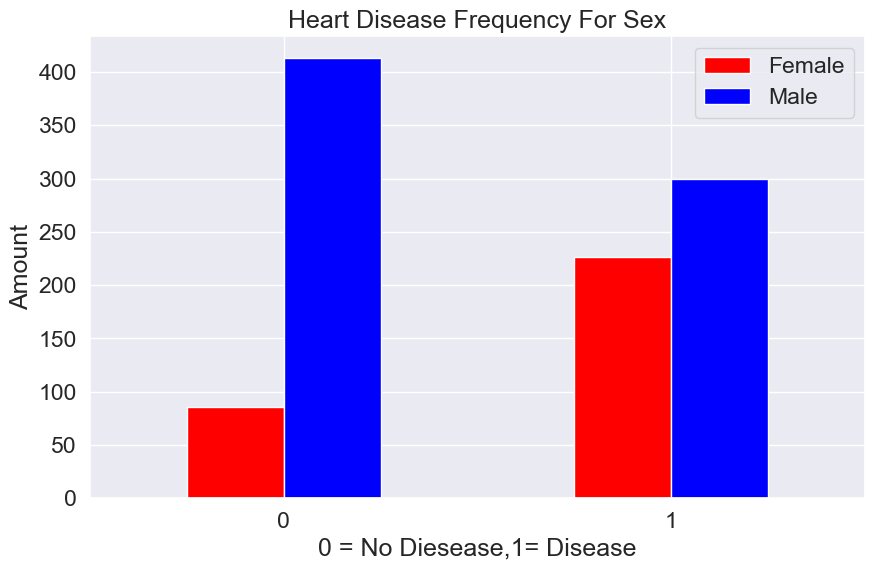

In [57]:
pd.crosstab(data.target,data.sex).plot(kind="bar",figsize=(10,6),color=["red","blue"])
plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = No Diesease,1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

In [58]:
data["thalach"].value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

# Age vs Max Heart Rate for Heart Disease

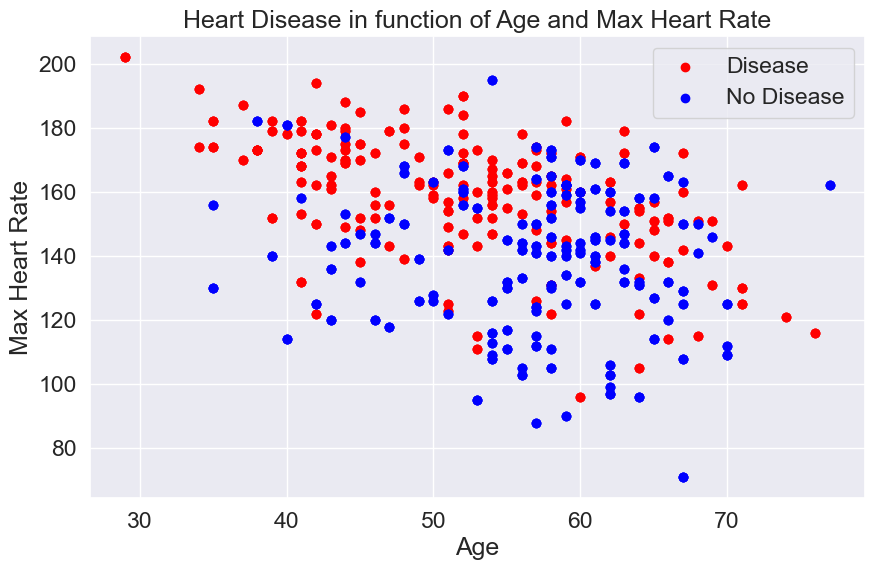

In [59]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="red")
# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="blue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

<Axes: ylabel='Frequency'>

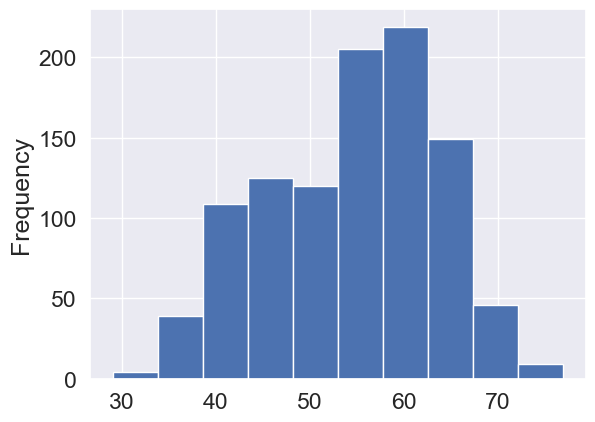

In [60]:
# check the distribution of age
data.age.plot.hist()

# Heart Disease Frequency per Chest Pain Type

In [61]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

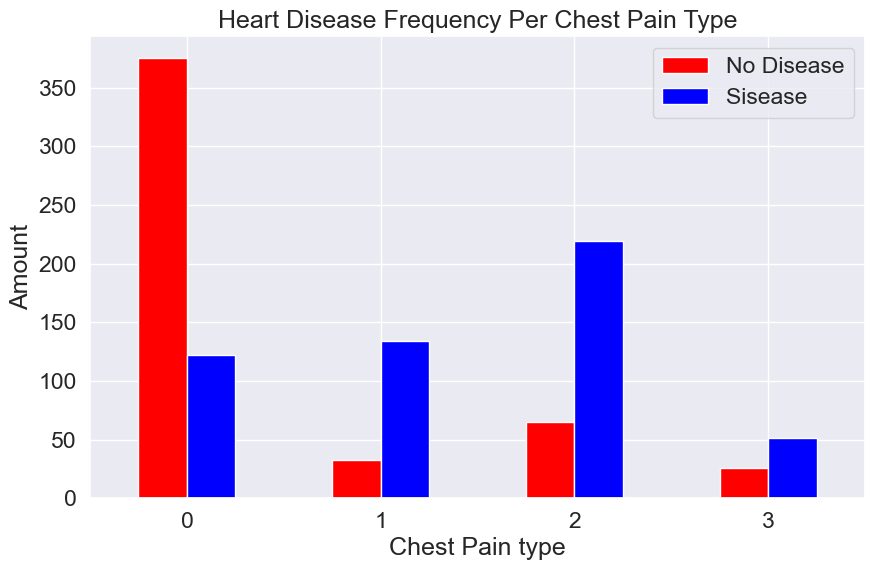

In [62]:
# Make the crosstab more visual

pd.crosstab(data.cp,data.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["red","blue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Sisease"])
plt.xticks(rotation=0)

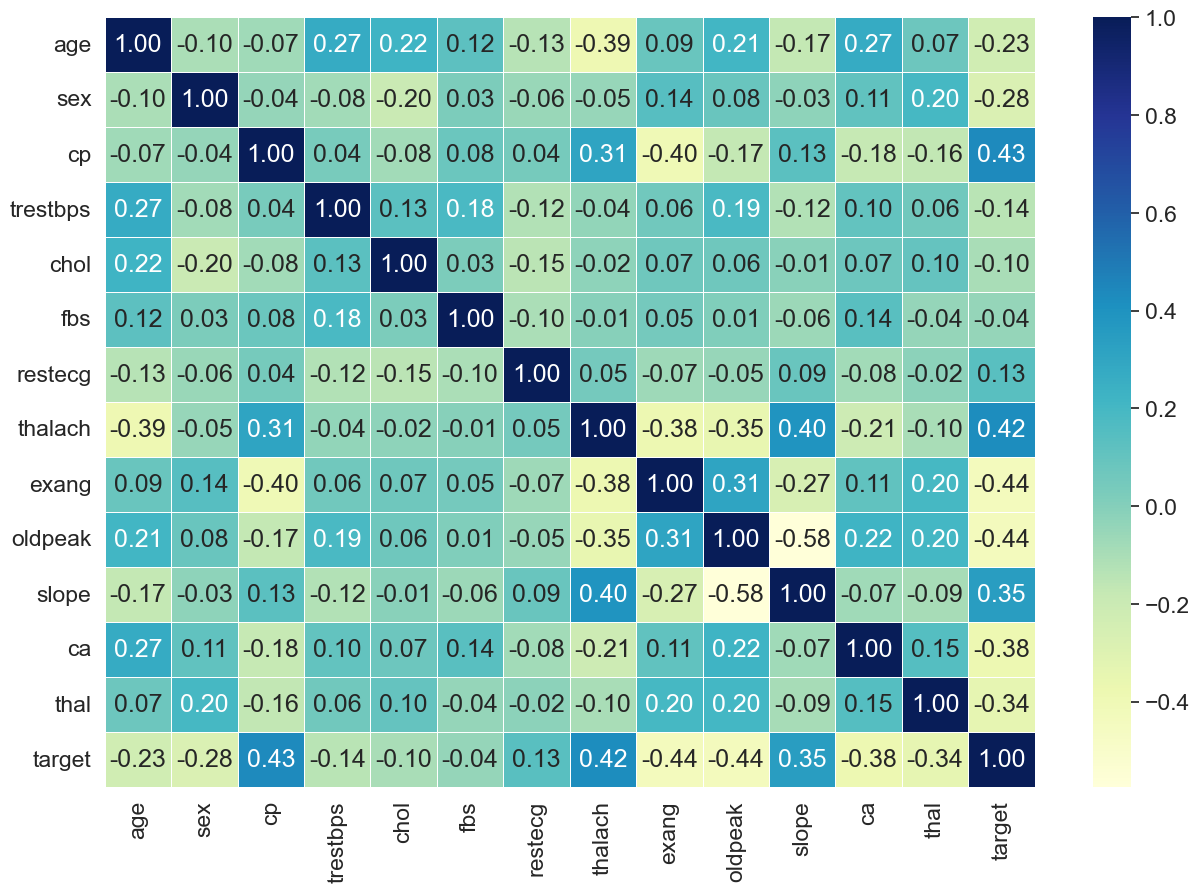

In [63]:
# Make correlation matrix
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu"
              )

# Modelling

In [64]:
#split data into x & y
X=data.drop("target",axis=1)
y=data["target"]

In [65]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [66]:
# split data into train and test sets
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Building Machine Learning Model

In [67]:
# Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()
       }

#Create function to fit & score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """   
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    #Set Random seed
    np.random.seed(42)
    #Make a dictinary to keep model scores
    model_scores={}
    #Loop models
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [68]:
model_scores=fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

C:\Users\AMOL ASHOK GHUNGARDE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7804878048780488,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

# Model Comparison

In [69]:
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.780488,0.731707,0.985366


In [70]:
model_compare.T

,accuracy
Logistic Regression,0.780488
KNN,0.731707
Random Forest,0.985366


<Axes: >

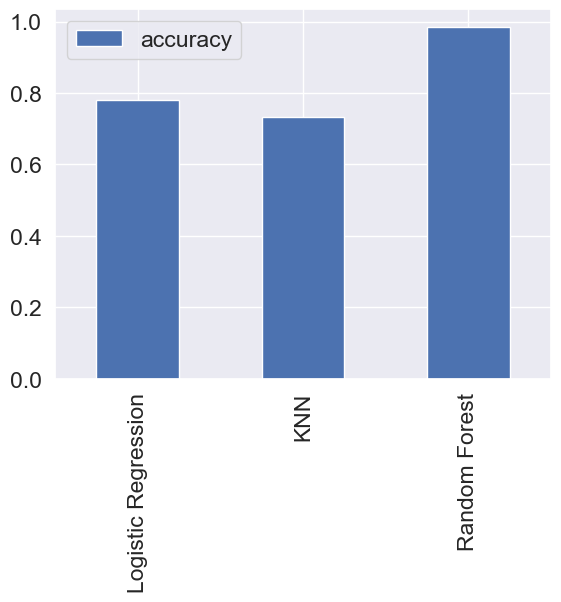

In [71]:
model_compare.T.plot.bar()

# Hyperparameter tuning

In [72]:
# KNN
train_scores=[]
test_scores=[]

#create a list of different values for n_neighbros
neighbors=range(1,21)

# Setup KNN instance
knn=KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithem
    knn.fit(X_train,y_train)
    #updating training scores list
    train_scores.append(knn.score(X_train,y_train))
    #Updating the test scores list
    test_scores.append(knn.score(X_test,y_test))

Maximum KNN score on the test data:98.54%


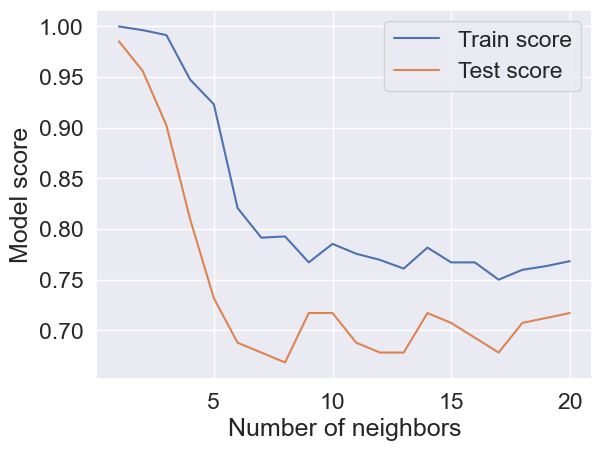

In [73]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV

In [74]:
# create a hyperparameter grid for logisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

#create a hy[er[arameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [75]:
#Tune Logistic Regression

np.random.seed(42)

# Setup random hyperparameter search for logisticRegression
rs_los_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
#Fit random hyperparameter search model for logisticRegression
rs_los_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [76]:
rs_los_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [77]:
rs_los_reg.score(X_test,y_test)

0.7853658536585366

In [78]:
# Find best parameters
rs_los_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [83]:
np.random.seed(42)
#random hyperparameter search for RandomForestClasifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [81]:
rs_rf.score(X_test,y_test)

0.926829268292683

# Hyperparameter Tuning with GridSearchCV

In [82]:
#Different hyperparameters for our Logistic Regression model
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
#Setup for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
#Fit the model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Best hyperparameters
gs_log_reg.best_params_

In [ ]:
gs_log_reg.score(X_test,y_test)

# Evaluating tuned ML classifier

In [ ]:
y_preds=gs_log_reg.predict(X_test)

In [ ]:
# Import ROC curve function from the sklearn.metrics module and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [ ]:
# confusion metrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

In [ ]:
print(classification_report(y_test,y_preds))

# Calculate evaluation metrics using cross-Validation

In [ ]:
gs_log_reg.best_params_

In [ ]:
# New clasiffifier with best parameters
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [ ]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc

In [ ]:
cv_acc=np.mean(accuracy)
cv_acc

In [ ]:
# New clasiffifier with best parameters
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [ ]:
# New clasiffifier with best parameters
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [ ]:
# Cross-validated precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
# cross- validated f1-score
cv_f1=cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

In [ ]:
# Example data (replace these with your actual data)
# Create DataFrame
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0])

# Transpose the DataFrame and plot the bar chart
cv_metrics.T.plot.bar(
    title="Cross-validated classification metrics",
    legend=False
)

# Feature Importance
Features most contributes to heart dieses

In [ ]:
# Fit an instance of LogisticRegression
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

clf.fit(X_train,y_train)

In [ ]:
# Fit an instance of LogisticRegression
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

clf.fit(X_train,y_train)

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

# Saving Macine Model

In [ ]:
# Importing joblib
from joblib import dump,load
#Save the model to file
dump(clf,filename="Heart_Disease_Clasification_Linear_Regression_Model.joblib")

In [ ]:
# Iporting saved model
loaded_ML_model=load("Heart_Disease_Clasification_Linear_Regression_Model.joblib")

In [ ]:
#Make prediction
Final_preds=loaded_ML_model.predict(X_test)
Final_preds

In [ ]:
loaded_ML_model.score(X_test,y_test)

# END OF Heart_Disease_Clasification ML Model